## 01. Introducción al conjunto de datos

Exploramos los fundamentos del aprendizaje automático utilizando el algoritmo de k-vecinos más cercanos. En este proyecto vamos a practicar el flujo de trabajo de aprendizaje automático que se ha aprendido hasta ahora para predecir el precio de mercado de un automóvil utilizando sus atributos. 

El conjunto de datos con el que trabajaremos contiene información sobre varios automóviles. Para cada automóvil tenemos información sobre los aspectos técnicos del vehículo, como el desplazamiento del motor, el peso del automóvil, las millas por galón, qué tan rápido acelera el automóvil y más. 

Puedes leer más sobre el conjunto de datos [aquí](https://archive.ics.uci.edu/ml/datasets/automobile) y puedes descargarlo directamente desde aquí. Aquí hay una vista previa del conjunto de datos:

| symboling | normalized_losses | make        | fuel_type | aspiration | num_doors | body_style  | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg | price |
|-----------|-------------------|-------------|-----------|------------|-----------|-------------|--------------|-----------------|------------|--------|-------|--------|-------------|-------------|---------------|-------------|-------------|------|--------|-------------------|------------|----------|----------|-------------|-------|
| 3         | ?                 | alfa-romero | gas       | std        | two       | convertible | rwd          | front           | 88.6       | 168.8  | 64.1  | 48.8   | 2548        | dohc        | four          | 130         | mpfi        | 3.47 | 2.68   | 9.0               | 111        | 5000     | 21       | 27          | 13495 |
| 3         | ?                 | alfa-romero | gas       | std        | two       | convertible | rwd          | front           | 88.6       | 168.8  | 64.1  | 48.8   | 2548        | dohc        | four          | 130         | mpfi        | 3.47 | 2.68   | 9.0               | 111        | 5000     | 21       | 27          | 16500 |
| 1         | ?                 | alfa-romero | gas       | std        | two       | hatchback   | rwd          | front           | 94.5       | 171.2  | 65.5  | 52.4   | 2823        | ohcv        | six           | 152         | mpfi        | 2.68 | 3.47   | 9.0               | 154        | 5000     | 19       | 26          | 16500 |
| 2         | 164               | audi        | gas       | std        | four      | sedan       | fwd          | front           | 99.8       | 176.6  | 66.2  | 54.3   | 2337        | ohc         | four          | 109         | mpfi        | 3.19 | 3.40   | 10.0              | 102        | 5500     | 24       | 30          | 13950 |
| 2         | 164               | audi        | gas       | std        | four      | sedan       | 4wd          | front           | 99.4       | 176.6  | 66.4  | 54.3   | 2824        | ohc         | five          | 136         | mpfi        | 3.19 | 3.40   | 8.0               | 115        | 5500     | 18       | 22          | 17450 |

- Lee `imports-85.data` en un dataframe llamado `cars`. Si lee el archivo usando `pandas.read_csv()` sin especificar ningún valor de parámetro adicional, notará que los nombres de las columnas no coinciden con los de la [documentación del conjunto de datos](https://archive.ics.uci.edu/ml/datasets/automobile). ¿Por qué crees que es esto y cómo puedes solucionarlo?
- Determine qué columnas son numéricas y se pueden usar como características y qué columna es la columna objetivo (target).
- Muestre las primeras filas del datframe y asegúrese de que se vea como la vista previa del conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score, KFold

[dataset Documentation](https://archive.ics.uci.edu/ml/datasets/automobile) 

Xpath 
```
$x('//p[contains(text(), "Attribute: Attribute Range")]/text()').map(x =>
x.wholeText)

```

In [83]:

cols = [ 
"1. symboling:-3, -2, -1, 0, 1, 2, 3.",
"2. normalized-losses:continuous from 65 to 256.",
"3. make: ## ",
"4. fuel-type:diesel, gas.",
"5. aspiration:       std, turbo.",
"6. num-of-doors:     four, two.",
"7. body-style:       hardtop, wagon, sedan, hatchback, convertible.",
"8. drive-wheels:     4wd, fwd, rwd.",
"9. engine-location:  front, rear.",
"10. wheel-base:       continuous from 86.6 120.9.",
"11. length:   continuous from 141.1 to 208.1.",
"12. width:    continuous from 60.3 to 72.3.",
"13. height:   continuous from 47.8 to 59.8.",
"14. curb-weight:      continuous from 1488 to 4066.",
"15. engine-type:      dohc, dohcv, l, ohc, ohcf, ohcv, rotor.",
"16. num-of-cylinders: eight, five, four, six, three, twelve, two.",
"17. engine-size:      continuous from 61 to 326.",
"18. fuel-system:      1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.",
"19. bore:     continuous from 2.54 to 3.94.",
"20. stroke:   continuous from 2.07 to 4.17.",
"21. compression-ratio:continuous from 7 to 23.",
"22. horsepower:       continuous from 48 to 288.",
"23. peak-rpm: continuous from 4150 to 6600.",
"24. city-mpg: continuous from 13 to 49.",
"25. highway-mpg:      continuous from 16 to 54.",
"26. price:    continuous from 5118 to 45400.",
]


[s.split(':')[0].split('.')[1].strip().replace('-', '_') for s in cols]

['symboling',
 'normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [7]:
colnames = [
    'symboling',
    'normalized_losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_of_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price',
           ]

In [8]:
cars = pd.read_csv('imports-85.data', names=colnames)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [10]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
cars.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 02. Limpieza de datos

Por lo general, no podemos tener valores faltantes si queremos usarlos para el modelado predictivo. Según la vista previa del conjunto de datos del último paso, podemos decir que la columna `normalized-losses` contiene valores faltantes representados con `"?"`. Reemplacemos estos valores y busquemos la presencia de valores faltantes en otras columnas numéricas. También cambiemos la escala de los valores en las columnas numéricas para que todos estén en el rango de 0 a 1.

----

- Utilice el método [`DataFrame.replace()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) para reemplazar todos los `?` valores con el valor faltante `numpy.nan`.
- Debido a que `?` es un valor de cadena, las columnas que contienen este valor se convirtieron en el tipo de datos `object` de pandas (en lugar de un tipo numérico como `int` o `float`). Después de reemplazar los `?` valores, determine qué columnas deben convertirse a tipos numéricos. Puede usar los métodos [`DataFrame.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) o [`Series.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) para convertir tipos de columna.
- Devuelve el número de filas a las que les falta un valor para la columna `normalized-losses`. Determine cómo debe manejar esta columna. Podrías:
    - Reemplazar los valores faltantes usando los valores promedio de esa columna.
    - Descartar las filas por completo (especialmente si a otras columnas de esas filas les faltan valores).
    - Quitar la columna por completo.
- Explore los valores faltantes para las otras columnas numéricas y maneje los valores faltantes.
- De las columnas que decidiste conservar, normaliza las numéricas para que todos los valores oscilen entre 0 y 1.

In [12]:
cars.columns[(cars.dtypes == 'object')].values.tolist()

['normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [13]:
cars.replace('?', np.nan, inplace=True)

In [14]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [16]:
cars.columns[cars.dtypes == 'int'].size

5

In [17]:
cars.columns[cars.dtypes == 'int'].values

array(['symboling', 'curb_weight', 'engine_size', 'city_mpg',
       'highway_mpg'], dtype=object)

In [18]:
cars.columns[cars.dtypes == 'float'].size

5

In [19]:
cars.columns[cars.dtypes == 'float'].values.tolist()

['wheel_base', 'length', 'width', 'height', 'compression_ratio']

In [20]:
cars.columns[cars.dtypes == 'object'].values.tolist()

['normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [21]:
cars.columns[cars.dtypes == 'object'].size

16

In [22]:
cols_to_numeric = [
    'curb_weight', 
    'engine_size', 
    'city_mpg',
    'highway_mpg',
    'normalized_losses',                                             
    'bore',
    'stroke',
    'horsepower',
    'peak_rpm',
    'price',
]

In [23]:
cars[cols_to_numeric] = cars[cols_to_numeric].astype('float')

In [24]:
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_type           object
num_of_cylinders      object
engine_size          float64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

In [25]:
print(cars.columns[cars.dtypes == 'float'].size)
print(cars.columns[cars.dtypes == 'int'].size)
print(cars.columns[cars.dtypes == 'object'].size)

15
1
10


In [26]:
print('Number of missing values:')
cars.isnull().sum()

Number of missing values:


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [27]:
print('Number of missing values:')
(cars.isnull().sum() / len(cars)).round(3)

Number of missing values:


symboling            0.00
normalized_losses    0.20
make                 0.00
fuel_type            0.00
aspiration           0.00
num_doors            0.01
body_style           0.00
drive_wheels         0.00
engine_location      0.00
wheel_base           0.00
length               0.00
width                0.00
height               0.00
curb_weight          0.00
engine_type          0.00
num_of_cylinders     0.00
engine_size          0.00
fuel_system          0.00
bore                 0.02
stroke               0.02
compression_ratio    0.00
horsepower           0.01
peak_rpm             0.01
city_mpg             0.00
highway_mpg          0.00
price                0.02
dtype: float64

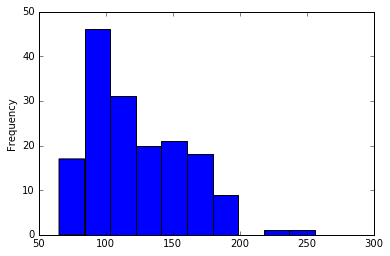

In [28]:
cars['normalized_losses'].plot(kind='hist')
plt.show()

In [29]:
cars['normalized_losses'].value_counts(bins=10).sort_index()

(64.80799999999999, 84.1]    17
(84.1, 103.2]                46
(103.2, 122.3]               31
(122.3, 141.4]               20
(141.4, 160.5]               21
(160.5, 179.6]               18
(179.6, 198.7]                9
(198.7, 217.8]                0
(217.8, 236.9]                1
(236.9, 256.0]                1
Name: normalized_losses, dtype: int64

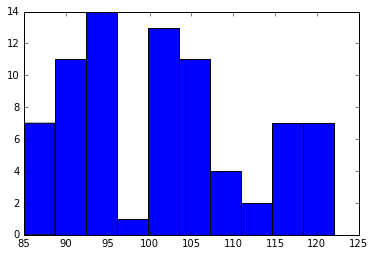

In [30]:
cars.loc[cars['normalized_losses'].between(84, 122), 'normalized_losses'].hist(grid=False)
plt.show()

In [31]:
cars['normalized_losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [32]:
cars.loc[cars['normalized_losses'].isnull(), 'normalized_losses'] = cars['normalized_losses'].median()

In [33]:
cars['normalized_losses'].isnull().sum()

0

In [34]:
cars.columns[cars.isnull().any()].values.tolist()

['num_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

In [35]:
cars.dropna(inplace=True)

In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
symboling            193 non-null int64
normalized_losses    193 non-null float64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_doors            193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null float64
engine_type          193 non-null object
num_of_cylinders     193 non-null object
engine_size          193 non-null float64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 

In [37]:
print(205 - 193)
print(12/205)
print(193/205)

12
0.05853658536585366
0.9414634146341463


In [38]:
cars.columns[cars.dtypes == 'float'].values.tolist()

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [39]:
cars2 = cars[cars.columns[cars.dtypes == 'float'].values.tolist()].copy()
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    193 non-null float64
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null float64
engine_size          193 non-null float64
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null float64
peak_rpm             193 non-null float64
city_mpg             193 non-null float64
highway_mpg          193 non-null float64
price                193 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [40]:
normalized_data = MinMaxScaler().fit_transform(cars2.drop(labels='price', axis='columns'))



In [41]:
cars2[cars2.drop(labels='price', axis='columns').columns]   = normalized_data

In [42]:
cars2.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.288229,0.359295,0.495917,0.478101,0.505829,0.416411,0.253299,0.564730,0.561362,0.196477,0.259261,0.387649,0.342401,0.389146,13285.025907
std,0.169768,0.179371,0.186248,0.182718,0.199564,0.204306,0.156945,0.194560,0.150200,0.248593,0.177384,0.191304,0.177440,0.179392,8089.082886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.157068,0.230321,0.376119,0.324786,0.350000,0.254849,0.139623,0.435714,0.495238,0.093750,0.102804,0.265306,0.166667,0.236842,7738.000000
50%,0.261780,0.303207,0.479104,0.435897,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.387755,0.333333,0.368421,10245.000000
75%,0.361257,0.460641,0.649254,0.564103,0.658333,0.567882,0.320755,0.750000,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16515.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


## 03. Modelo Univariado

- Cree una función llamada `knn_train_test()` que encapsule el proceso de capacitación y validación simple. Esta función debe tener 3 parámetros: el nombre de la columna de entrenamiento, el nombre de la columna objetivo (target) y dataframe.

    - Esta función debe dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba.
    - Luego, debe instanciar la clase KNeighborsRegressor, ajustar el modelo en el conjunto de entrenamiento y hacer predicciones en el conjunto de prueba.
    - Finalmente, debe calcular el RMSE y devolver ese valor.

- Use esta función para entrenar y probar modelos univariados usando las diferentes columnas numéricas en el conjunto de datos. ¿Qué columna funcionó mejor usando el valor `k` predeterminado?

- Modifique la función `knn_train_test()` que escribió para aceptar un parámetro para el valor k.
    - Actualice la lógica de la función para usar este parámetro.
    - Para cada columna numérica, cree, entrene y pruebe un modelo univariante utilizando los siguientes valores `k` (`1`, `3`, `5`, `7` y `9`). Visualice los resultados mediante un diagrama de dispersión o un diagrama de líneas.

In [44]:
print(cars2.shape)
print(cars2.shape[0] / 2)

(193, 15)
96.5


In [151]:
print(cars2.loc[np.random.permutation(cars2.index)].index)

Int64Index([ 82, 175,  17,  43, 142,  53,  33, 105, 159, 114,
            ...
             70,  47,  97, 117, 128, 202,  95,   5, 102, 153],
           dtype='int64', length=193)


In [185]:
np.random.seed(2021)
def knn_train_test(train_col, target_col, df):        
    df = df.loc[np.random.permutation(cars2.index)]
    train_df = df.iloc[:96]
    test_df = df.iloc[96:]
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
    knn.fit(train_df[[train_col]], train_df[[target_col]])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    return np.sqrt(mse)

In [186]:
# print(cars2.columns.size)
# print(cars2.drop(columns='price').columns.size)
rmses = {column:knn_train_test(column, 'price', cars2) for column in cars2.drop(columns='price').columns}

In [199]:
rmse_series = pd.Series(rmses)
print(rmse_series.sort_values())

engine_size          3419.753639
city_mpg             3665.811395
curb_weight          4133.453012
horsepower           4254.782370
highway_mpg          4769.273884
width                4817.643564
length               5157.064751
bore                 6096.698536
compression_ratio    6309.956494
wheel_base           6423.863834
normalized_losses    6644.193506
stroke               6973.838063
height               7322.155236
peak_rpm             7682.025436
dtype: float64


In [205]:
print(rmse_series.sort_values().index.values.tolist())

['engine_size', 'city_mpg', 'curb_weight', 'horsepower', 'highway_mpg', 'width', 'length', 'bore', 'compression_ratio', 'wheel_base', 'normalized_losses', 'stroke', 'height', 'peak_rpm']


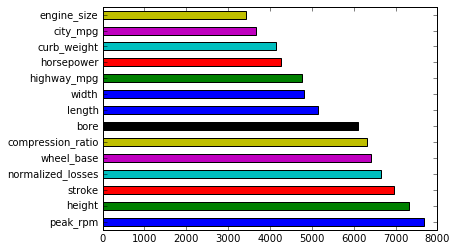

In [188]:
rmse_series.sort_values(ascending=False).plot(kind='barh')
plt.show()

In [189]:
np.random.seed(2021)
def knn_train_test(train_col, target_col, df, k):
    df = df.loc[np.random.permutation(cars2.index)]
    train_df = df.iloc[:96]
    test_df = df.iloc[96:]
    rmse_list = []
    for neighbor in k:
        knn = KNeighborsRegressor(n_neighbors=neighbor, algorithm='brute')
        knn.fit(train_df[[train_col]], train_df[[target_col]])
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse_list.append(np.sqrt(mse))
    return rmse_list

In [190]:
train_cols = cars2.drop(columns='price').columns
neighbor_list = [1, 3, 5, 7, 9]

In [191]:
rmses_several_k = {column:knn_train_test(column, 'price', cars2, k=neighbor_list) for column in train_cols}

In [192]:
pd.DataFrame(rmses_several_k, index=neighbor_list)


,bore,city_mpg,compression_ratio,curb_weight,engine_size,height,highway_mpg,horsepower,length,normalized_losses,peak_rpm,stroke,wheel_base,width
1,6747.270228,4376.176836,7737.393764,5457.443106,2951.630905,7638.792892,5724.722183,4466.099923,5864.264399,8988.953044,6886.554870,6925.387372,5546.930305,4545.567617
3,5436.153337,4017.624751,7129.183384,4319.129843,3202.484682,7093.394377,3889.489976,4229.148071,5333.264020,6102.400578,8114.518272,6941.567771,6738.051646,4609.918432
5,6096.698536,3665.811395,6309.956494,4133.453012,3419.753639,7322.155236,4769.273884,4254.782370,5157.064751,6644.193506,7682.025436,6973.838063,6423.863834,4817.643564
7,6355.309692,3559.168883,6060.376039,3973.802752,3717.894814,7096.883645,4459.084107,4352.525254,5271.530985,6628.806107,7536.524798,7369.268050,6527.553718,4878.408883
9,6433.723228,3712.247249,6323.780214,4035.250382,3719.461644,6985.312711,4072.678726,4630.382250,5318.678639,6762.471392,7217.185072,7938.015297,6719.521464,5134.069368


In [193]:
rmses_df = pd.DataFrame(rmses_several_k, index=neighbor_list)
print(rmses_df)

          bore     city_mpg  compression_ratio  curb_weight  engine_size  \
1  6747.270228  4376.176836        7737.393764  5457.443106  2951.630905   
3  5436.153337  4017.624751        7129.183384  4319.129843  3202.484682   
5  6096.698536  3665.811395        6309.956494  4133.453012  3419.753639   
7  6355.309692  3559.168883        6060.376039  3973.802752  3717.894814   
9  6433.723228  3712.247249        6323.780214  4035.250382  3719.461644   

        height  highway_mpg   horsepower       length  normalized_losses  \
1  7638.792892  5724.722183  4466.099923  5864.264399        8988.953044   
3  7093.394377  3889.489976  4229.148071  5333.264020        6102.400578   
5  7322.155236  4769.273884  4254.782370  5157.064751        6644.193506   
7  7096.883645  4459.084107  4352.525254  5271.530985        6628.806107   
9  6985.312711  4072.678726  4630.382250  5318.678639        6762.471392   

      peak_rpm       stroke   wheel_base        width  
1  6886.554870  6925.387372  5

In [194]:
print(rmses_df.columns.size)

14


In [195]:
print(rmses_df.describe().loc['min'], '\n')
print(rmses_df.describe().loc['min'].min())

print()
print(rmses_df.describe().loc['max'], '\n')
print(rmses_df.describe().loc['max'].max())
print()
print(rmses_df.describe().loc[['min', 'max']])

bore                 5436.153337
city_mpg             3559.168883
compression_ratio    6060.376039
curb_weight          3973.802752
engine_size          2951.630905
height               6985.312711
highway_mpg          3889.489976
horsepower           4229.148071
length               5157.064751
normalized_losses    6102.400578
peak_rpm             6886.554870
stroke               6925.387372
wheel_base           5546.930305
width                4545.567617
Name: min, dtype: float64 

2951.6309051099192

bore                 6747.270228
city_mpg             4376.176836
compression_ratio    7737.393764
curb_weight          5457.443106
engine_size          3719.461644
height               7638.792892
highway_mpg          5724.722183
horsepower           4630.382250
length               5864.264399
normalized_losses    8988.953044
peak_rpm             8114.518272
stroke               7938.015297
wheel_base           6738.051646
width                5134.069368
Name: max, dtype: float64 



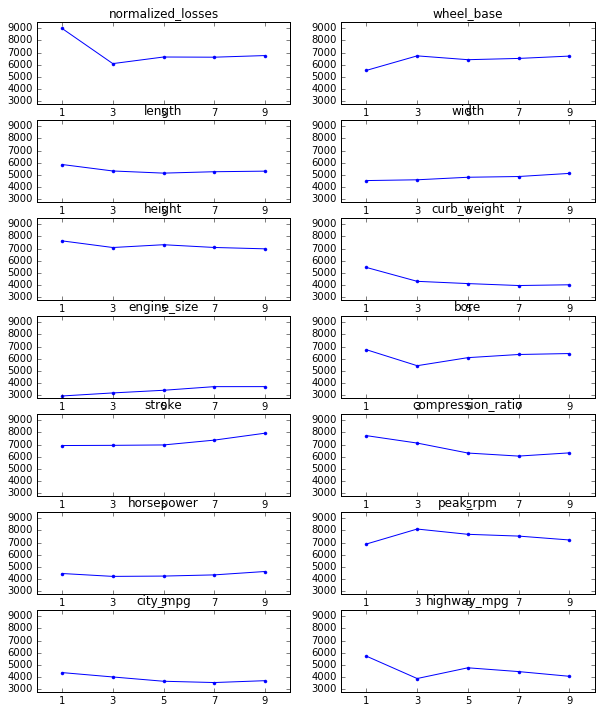

In [198]:
plt.figure(figsize=(10,12))
for i, col in zip(range(1, rmses_df.columns.size + 1), train_cols):
    plt.subplot(7, 2, i)
    plt.plot(rmses_df[col], marker='.')
    plt.title(col)
    plt.xticks(neighbor_list)
    plt.xlim([0,10])
    plt.ylim([2800, 9500])

plt.subplots_adjust(
    hspace=0.6,
#     wspace=0.6,
)
plt.show()    

## 04. Modelo Multivariado

Modifiquemos la función `knn_train_test()` que escribimos en el último paso para trabajar con varias columnas.

- Modifique la función `knn_train_test()` para aceptar una lista de nombres de columna (en lugar de solo una cadena). Modifique el resto de la lógica de la función para usar este parámetro:
    - En lugar de usar solo una columna para entrenar y probar, use todas las columnas que se asignarán al parámetro.
    - Utilice el valor `k` predeterminado de scikit-learn por ahora (ajustaremos el valor k en el siguiente paso).
- Utilice las 2 mejores características del paso anterior para entrenar y probar un modelo multivariado de k vecinos más cercanos utilizando el valor `k` predeterminado.
- Utilice las 3 mejores características del paso anterior para entrenar y probar un modelo multivariado de k vecinos más cercanos utilizando el valor `k` predeterminado.
- Utilice las mejores 4 características del paso anterior para entrenar y probar un modelo multivariado de k vecinos más cercanos utilizando el valor `k` predeterminado.
- Use las mejores 5 características del paso anterior para entrenar y probar un modelo multivariado de `k` vecinos más cercanos usando el valor k predeterminado.
- Muestra todos los valores RMSE.


In [212]:
np.random.seed(2021)
def knn_train_test(train_cols, target_col, df, k=5):        
    df = df.loc[np.random.permutation(cars2.index)]
    train_df = df.iloc[:96]
    test_df = df.iloc[96:]
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    return np.sqrt(mse)

In [206]:
two_best_features = ['engine_size', 
                     'city_mpg',                      
                    ]

three_best_features = ['engine_size', 
                     'city_mpg', 
                     'curb_weight',                      
                    ]

four_best_features = ['engine_size', 
                     'city_mpg', 
                     'curb_weight', 
                     'horsepower',                      
                    ]

five_best_features = ['engine_size', 
                     'city_mpg', 
                     'curb_weight', 
                     'horsepower', 
                     'highway_mpg',                      
                    ]

In [214]:
best_features = {
    'best{}feat'.format(len(two_best_features)): knn_train_test(two_best_features, 'price', cars2),
    'best{}feat'.format(len(three_best_features)): knn_train_test(three_best_features, 'price', cars2),
    'best{}feat'.format(len(four_best_features)): knn_train_test(four_best_features, 'price', cars2),
    'best{}feat'.format(len(five_best_features)): knn_train_test(five_best_features, 'price', cars2),
}

In [216]:
best_features_series = pd.Series(best_features)
print(best_features_series.sort_values())

best3feat    2559.264688
best2feat    3299.178270
best5feat    3426.200984
best4feat    3699.570431
dtype: float64


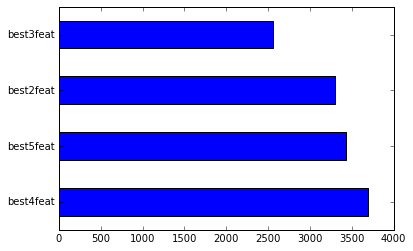

In [222]:
best_features_series.sort_values(ascending=False).plot.barh(color='blue')
plt.show()

## 05. Ajuste de hiperparámetros

Ahora vamos a optimizar el modelo que funcionó mejor en el paso anterior.

- Para los 3 modelos principales en el último paso, varíe el valor del hiperparámetro de 1 a 25 y represente gráficamente los valores RMSE resultantes.

- ¿Qué valor de k es óptimo para cada modelo? ¿Qué tan diferentes son los valores de k y qué crees que explica las diferencias?


In [ ]:
hyper_param = range(1, 26)

In [225]:
mse3feat = [knn_train_test(three_best_features, 'price', cars2, k=neighbor) for neighbor in hyper_param]
mse2feat = [knn_train_test(two_best_features, 'price', cars2, k=neighbor) for neighbor in hyper_param]
mse5feat = [knn_train_test(five_best_features, 'price', cars2, k=neighbor) for neighbor in hyper_param]

In [250]:
print(min(enumerate(mse3feat, 1), key=lambda t:t[1]))
print(min(enumerate(mse2feat, 1), key=lambda t:t[1]))
print(min(enumerate(mse5feat, 1), key=lambda t:t[1]))

(3, 2426.470932355673)
(6, 2857.8302531840036)
(2, 2596.0327062376678)


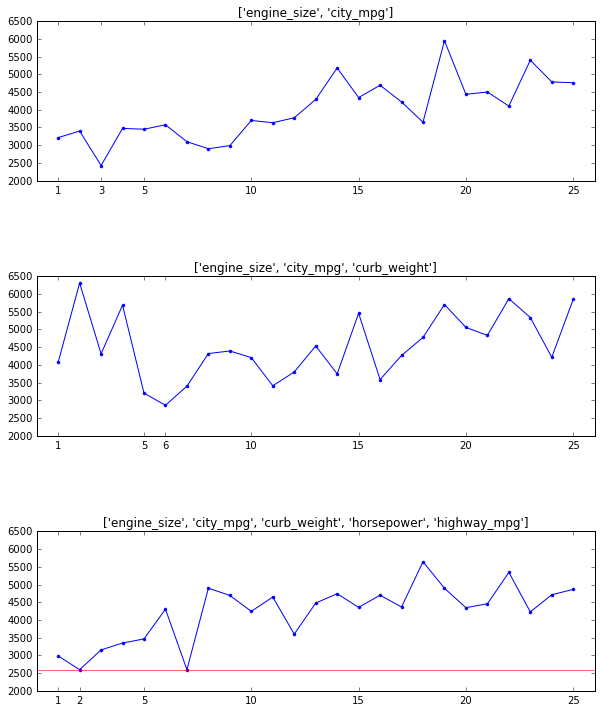

In [257]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.plot(hyper_param, mse3feat, marker='.')
plt.xticks([1,3,5,10,15,20,25])
plt.xlim([0,26])
plt.ylim([2000,6500])
plt.title(two_best_features)

plt.subplot(3,1,2)
plt.plot(hyper_param, mse2feat, marker='.')
plt.xticks([1,5,6,10,15,20,25])
plt.xlim([0,26])
plt.ylim([2000,6500])
plt.title(three_best_features)

plt.subplot(3,1,3)
plt.plot(hyper_param, mse5feat, marker='.')
plt.axhline(2596.0327062376678, color='red', alpha=0.6)
plt.xticks([1,2,5,10,15,20,25])
plt.xlim([0,26])
plt.ylim([2000,6500])
plt.title(five_best_features)

plt.subplots_adjust(
    hspace=0.6,
#     wspace=0.6,
)
plt.show()

## 06. Lo que sigue

Aquí hay algunas ideas para los próximos pasos:

- Modifique la función `knn_train_test()` para usar la validación cruzada k-fold en lugar de la validación de prueba/entrenamiento.
- Modifique la función `knn_train_test()` para realizar también la limpieza de datos.